# Chemofacies Classification of Sycamore core using XRF Data

Problem Statement: An approximately 300ft core from the Sycamore formation was examined for every foot and characterized. It was broadly categorized into 3 distinct groups on visual inspection: Argillaceous mudstone, Bioturbated mudstone and Massive Siltstone mostly cemented by carbonates. On examining the SEM images from various points in the whole core, it was observed that among the massive siltstone there existed porous layers and non porous layers.

XRF data is available for every feet of the core, using machine learning methods can we delineate the zones of high porosity and low porosity siltstones.

## Import relevant Libraries 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Core lab data measuring phyllosilicates, tectosilicates, carbonates, TOC and porosity were made available and each sample point is labelled by a geologist using SEM Images at those points.

([], <a list of 0 Text xticklabel objects>)

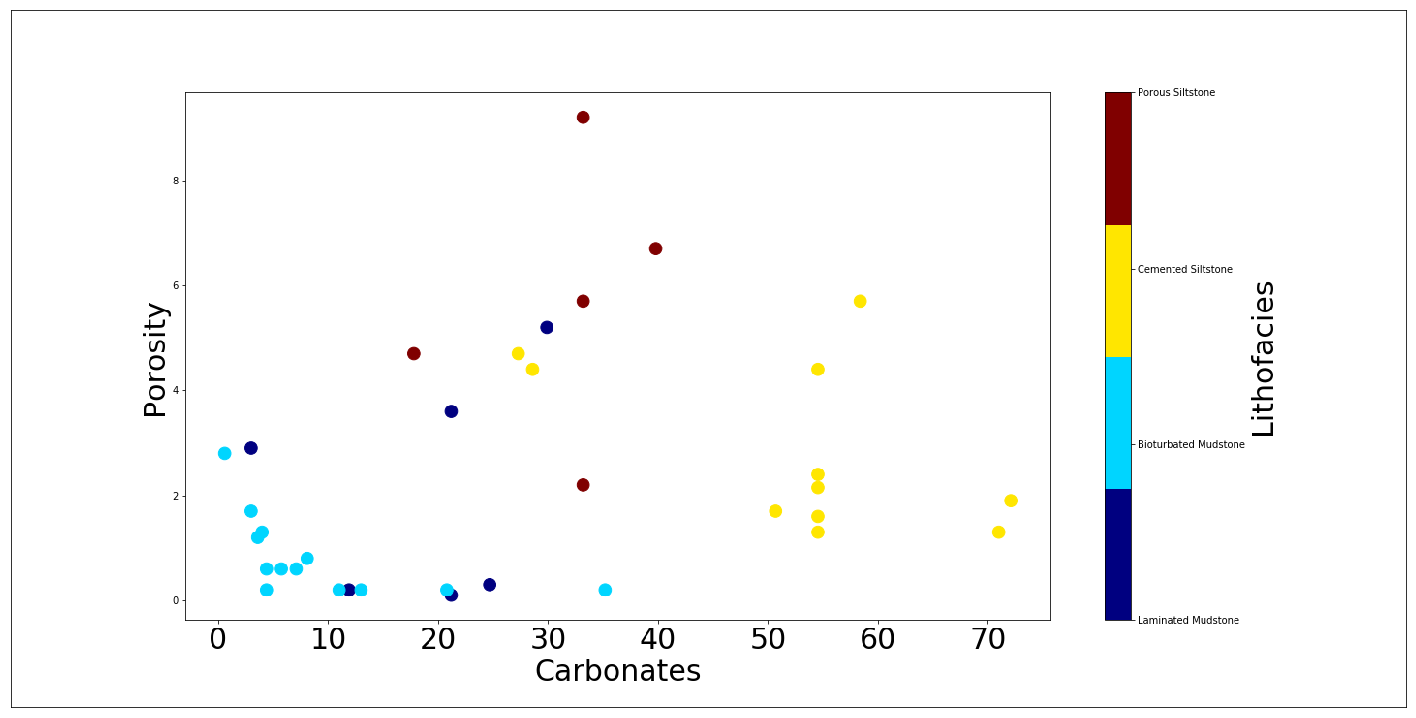

In [175]:
import matplotlib.image as mpimg
img1=mpimg.imread('carporfull.png')
plt.figure(figsize=(25,115))
imgplot = plt.imshow(img1)
plt.yticks([])
plt.xticks([])

([], <a list of 0 Text xticklabel objects>)

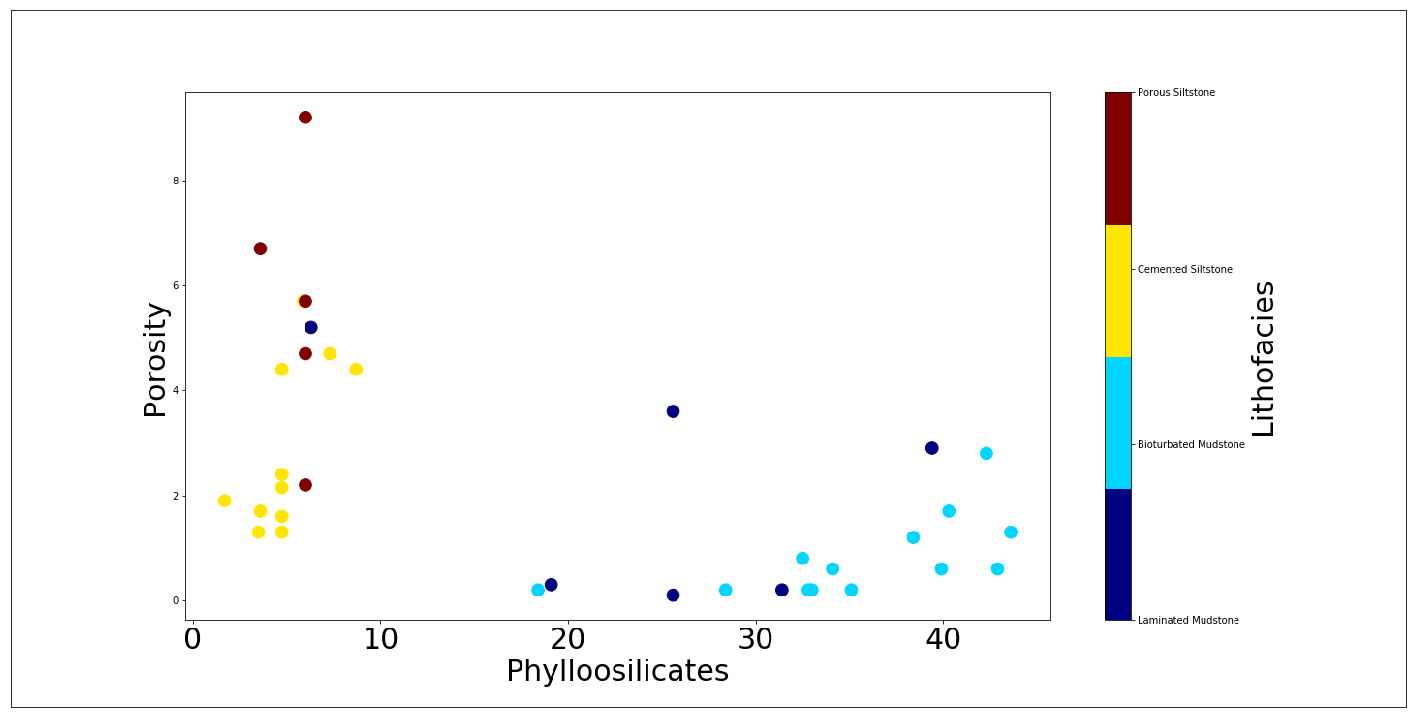

In [174]:
import matplotlib.image as mpimg
img2=mpimg.imread('phyllporfull.png')
plt.figure(figsize=(25,115))
imgplot = plt.imshow(img2)
plt.yticks([])
plt.xticks([])

([], <a list of 0 Text xticklabel objects>)

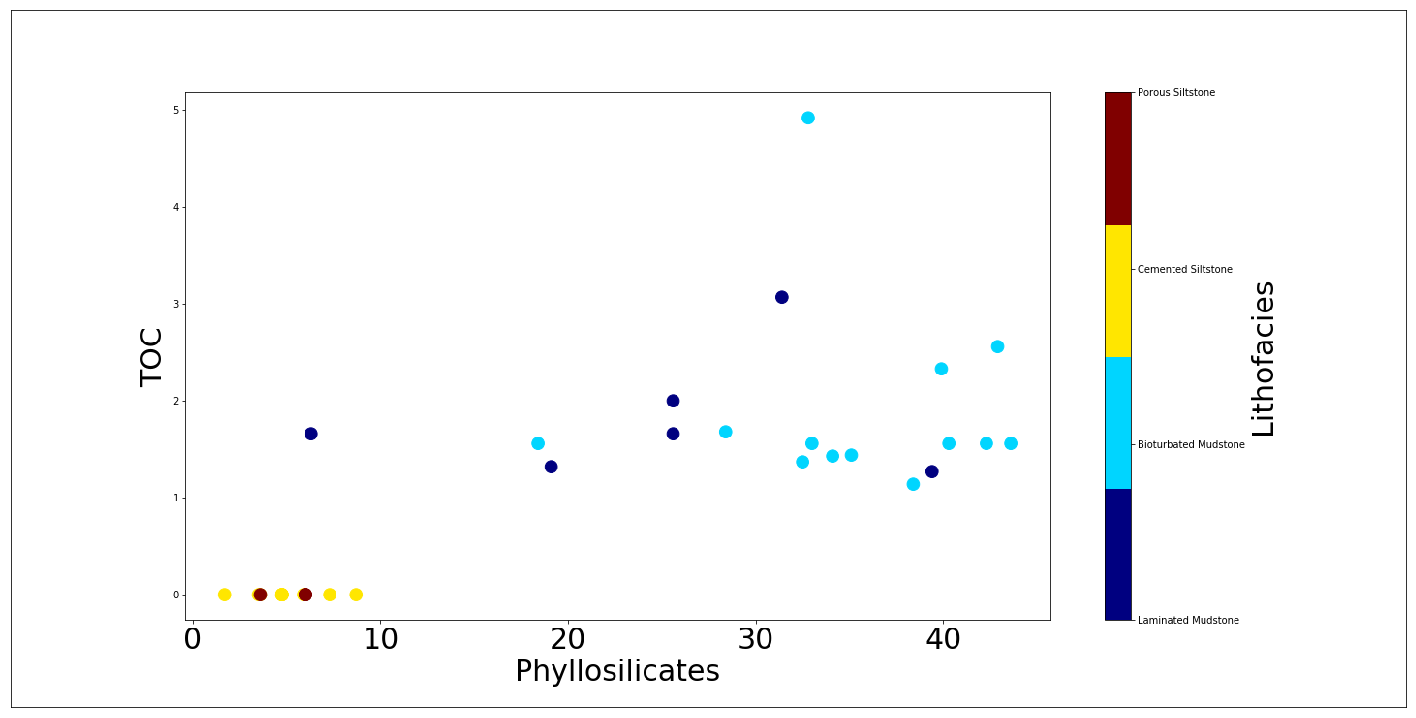

In [173]:
import matplotlib.image as mpimg
img3=mpimg.imread('tocphyllfull.png')
plt.figure(figsize=(25,115))
imgplot = plt.imshow(img3)
plt.yticks([])
plt.xticks([])

From the plot it is clear that there is clear distinction between the more argillaceous facies and the siltstones (observe phyllosilicate distribution) and also there is distinction between porosities in the siltstones which is characterized by their carbonate concentration. Geologist hypothesize that this is due to the deposotional environment with some zone having higher calcite deposition leaving the zones more cemented and therefore less porous

## Read XRF data into a Pandas Dataframe and replace strings in the dataset

In [38]:
xrf_data = pd.read_csv('XRF chemofacies.csv', index_col = 'Depth')
xrf_data.replace('#¡VALOR!', np.nan, inplace = True)
xrf_data = xrf_data.iloc[:,1:]

In [39]:
xrf_data.head()

,Mg (ppm),Al (ppm),Si (ppm),P (ppm),S (ppm),K (ppm),Ca (ppm),Ti (ppm),V (ppm),Mn (ppm),Fe (ppm),Th (ppm),Rb (ppm),U (ppm),Sr (ppm),Zr (ppm),Mo (ppm),Si/Al,Si/Ti
Depth,,,,,,,,,,,,,,,,,,,
7940,3890.112227,22015.734900,291180.3985,1132.878713,5745.443139,4864.353333,69133.512790,1968.075374,21.712150,296.208679,7456.322062,3.355422,20.734987,0.000000,427.640404,405.690361,1.702999,13.22601311,147.9518531
7941,1719.603122,20602.503100,303459.6453,663.285688,5365.384221,4465.540337,37724.484340,1971.422294,25.662803,297.496315,7831.364426,3.755095,27.438040,0.339529,365.713114,392.681295,7.347334,14.72926099,153.9292958
7942,0.000000,78367.706040,243315.7689,83.370285,11599.274050,26231.953910,1010.274637,4613.652808,0.000000,232.689386,20001.666130,11.323554,147.671897,0.000000,254.940587,333.369871,14.647980,3.104796365,52.73820528
7943,4268.961279,15737.845000,241155.8830,1307.613854,11510.923270,3412.792936,120760.844800,1697.429707,22.882061,268.875488,7883.434289,3.512044,18.411630,0.000000,427.228349,302.556600,3.559057,15.32331034,142.0712045
7944,0.000000,8026.180808,145651.9213,315.536598,9791.126856,1449.492609,109388.799800,1092.382766,60.949424,249.309063,7590.938547,3.494415,22.335306,3.753934,494.943524,466.111084,0.000000,18.14710193,133.3341442


In [40]:
X = xrf_data.iloc[:,:].values #Set Data in Array form (not necessary but something I like to do)

In [41]:
X = X.astype(float) #Convert all datapoints to float just as safety measure as some data could be stored in string format

## Identify all Rows with Null Values

In [42]:
X[np.isnan(X).any(axis = 1)]

array([[0.00000000e+00, 0.00000000e+00, 1.67626308e+04, 0.00000000e+00,
        1.83979433e+03, 0.00000000e+00, 2.38102696e+03, 7.31013112e+01,
        1.43319845e+01, 2.02544530e+02, 1.62640179e+04, 7.65166271e+00,
        1.00216570e+02, 4.78219179e+00, 2.29052687e+02, 1.46727412e+02,
        2.37842914e+01,            nan, 2.29306842e+02],
       [0.00000000e+00, 0.00000000e+00, 2.13073192e+04, 0.00000000e+00,
        1.94620253e+03, 0.00000000e+00, 1.45340179e+04, 0.00000000e+00,
        3.27834279e+01, 2.05811916e+02, 1.37564897e+04, 3.37460464e+00,
        1.81254540e+01, 0.00000000e+00, 5.87423425e+02, 5.08470615e+01,
        1.08741067e+01,            nan,            nan],
       [0.00000000e+00, 1.28562096e+04, 1.10969446e+05, 6.68115092e+01,
        1.11822900e+04, 2.41129747e+03, 7.93056591e+04, 0.00000000e+00,
        0.00000000e+00, 2.65299135e+02, 2.73038765e+03, 4.45374742e+00,
        1.12770408e+01, 0.00000000e+00, 4.77055204e+02, 2.78843675e+02,
        0.00000000e+00

Since there are just 3 rows with empty cells we can afford to remove those sample points. However in cases were there are large amount of empty cells spread across different rows and a limited dataset. Various statistical methods (e.g imputer) can be applied to replace the cells

In [43]:
X_new = X[~np.isnan(X).any(axis = 1)] #Dropping all Null points from the Dataset

## Plot Correlation Matrix of the Dataset to observe relationship between Variables

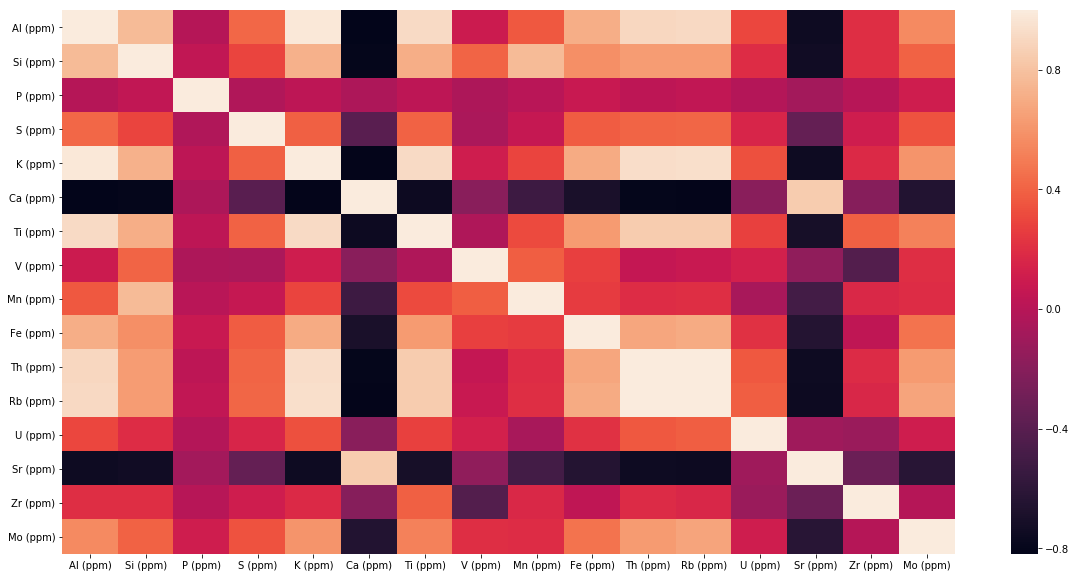

In [44]:
fig = plt.figure(figsize=(20,10))
sb.heatmap(xrf_data.iloc[:,1:].corr())

## Scale Features 

In [52]:
from sklearn.preprocessing import RobustScaler

In [53]:
transformer = RobustScaler()
transformer.fit(X_new)
X_scale = transformer.transform(X_new)

In [54]:
xrf_data_proper  = pd.DataFrame(np.array(xrf_data.dropna().iloc[:,:]).astype(float), columns = xrf_data.columns) 

## Visualize Dataset Using Key Elemental Proxies

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


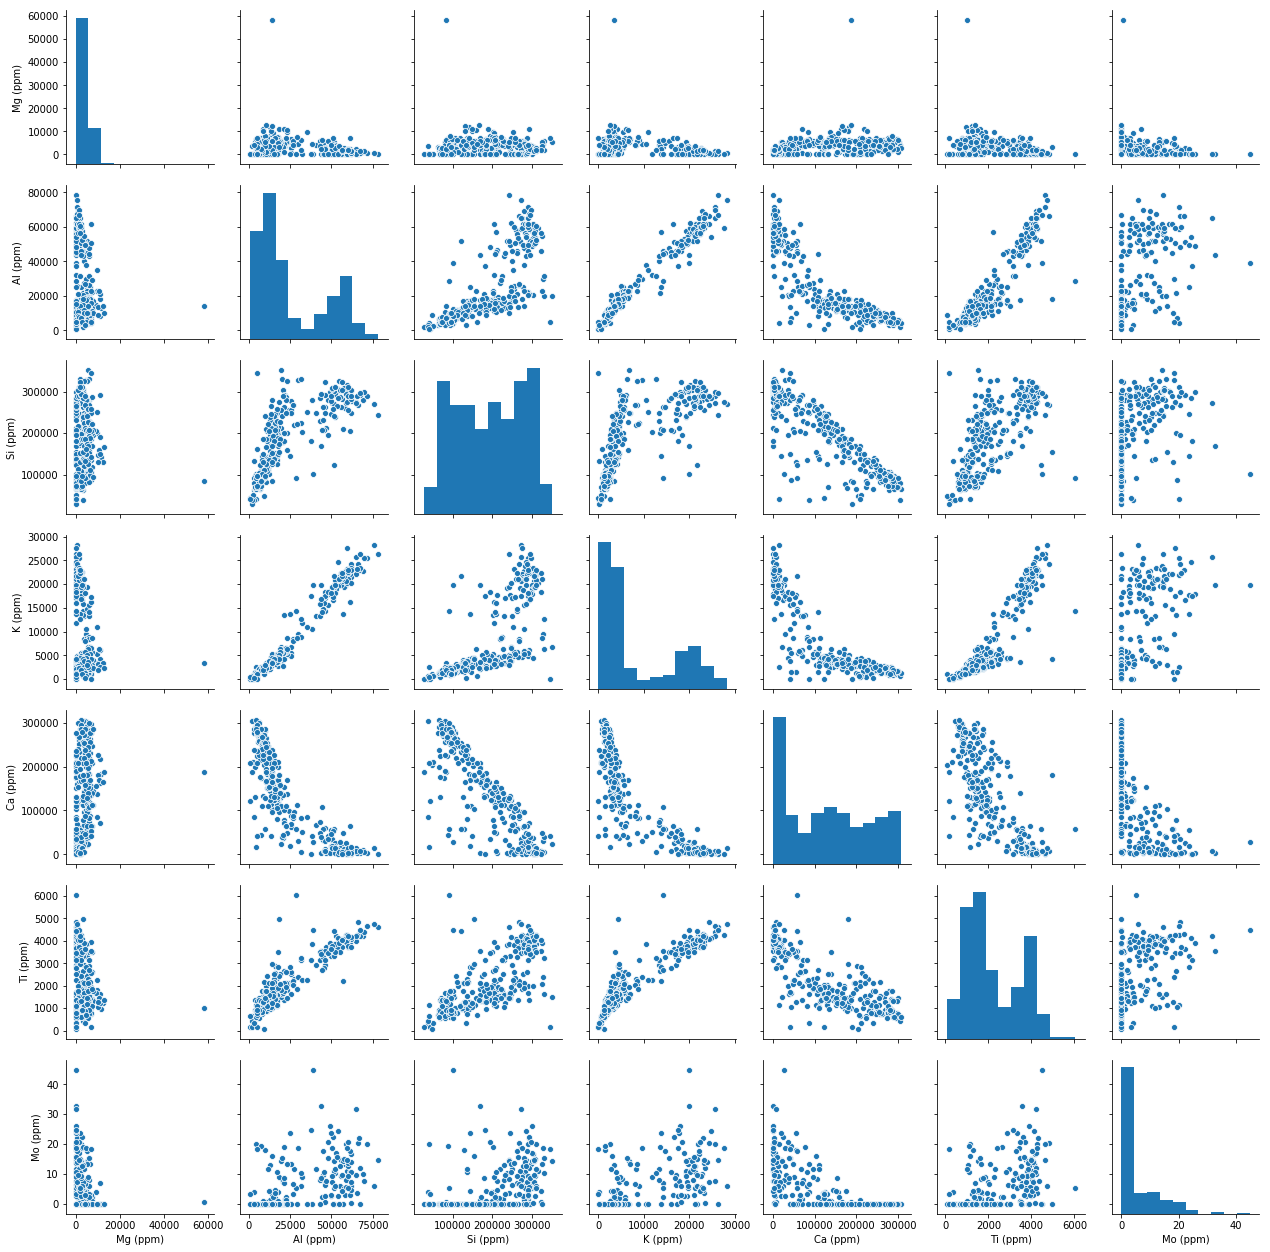

In [55]:
sb.pairplot(xrf_data_proper.ix[:,(0,1,2,5,6,7,16)])

## Remove Outliers from the Dataset to improve algorithm performance

In [56]:
from sklearn.ensemble import IsolationForest
isol = IsolationForest(behaviour = 'new', contamination = 'auto')
isol.fit(X_scale)
label = isol.predict(X_scale)

In [57]:
X_new_clean = X_new[label  == 1]
X_scale = X_scale[label == 1]

We currently have about 18 elemental proxies, this could prove difficult when running the K-means algorithm as it is adversely affected by high dimensionality, because of that we apply the feature reduction technique PCA (principal component analysis) to reduce the features while maintaining most of the information in the data

In [58]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA()
pca.fit(X_scale)
pca.explained_variance_ratio_

array([3.83335778e-01, 1.46608697e-01, 1.16700657e-01, 9.01256048e-02,
       5.94672791e-02, 4.47320391e-02, 3.74895444e-02, 3.39397573e-02,
       2.40903493e-02, 2.18980525e-02, 1.53268794e-02, 1.08214140e-02,
       7.54597505e-03, 2.86756208e-03, 2.50083938e-03, 1.25471649e-03,
       9.72783537e-04, 2.32959122e-04, 8.91120810e-05])

We select the 7 components that explains approximately 92% of the variance

In [60]:
pca = PCA(n_components=7)
pca.fit(X_scale)
X_pca = pca.transform(X_scale)

We use an elbow plot to identify the optimal number of clusters required. From the plot below, 4 or 5 seem to be the optimal number of clusters as we notice a smaller drop in inertia as we increase cluster number past 4,5. However, we already have an idea of the expected results. We want to delineate the porous siltstone, non-porous siltstone and the more argillaceous formation, so we pick three as the number of clusters.

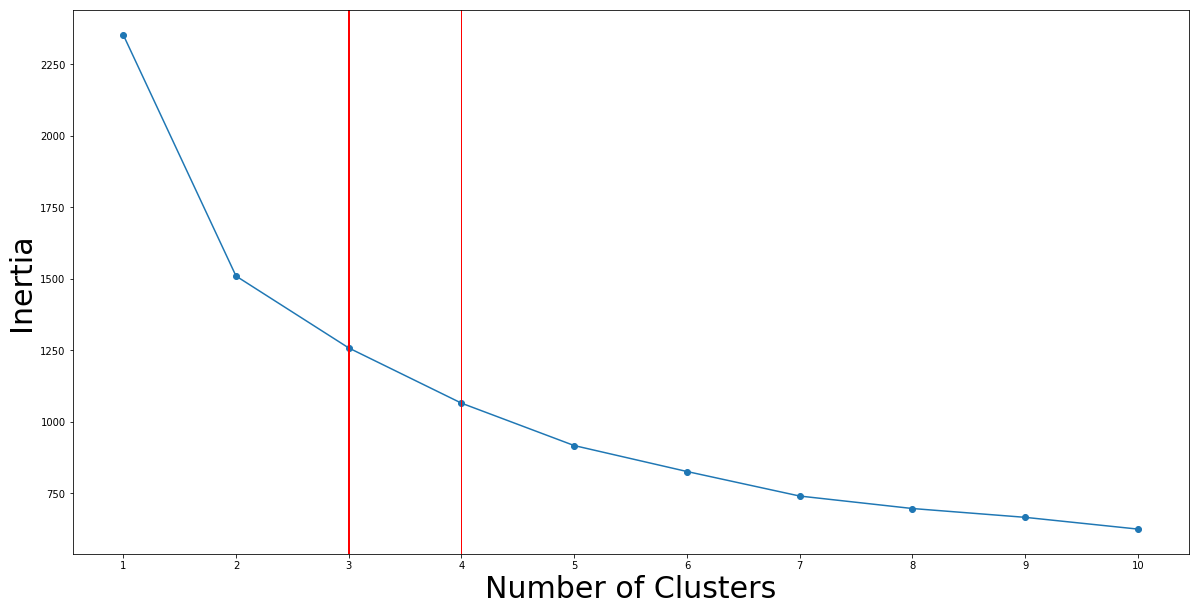

In [74]:
from sklearn.cluster import KMeans
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X_pca)
    distortions.append(km.inertia_)
plt.figure(figsize=(20,10))    
plt.plot(range(1,11), distortions, marker = 'o')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.xlabel('Number of Clusters', fontsize = 30)
plt.ylabel('Inertia', fontsize = 30)
plt.axvline(x = 3, linewidth = 2, color = 'red')
plt.axvline(x = 4, linewidth = 1, color = 'red')
plt.savefig('elbow.png')

## Training K-MEANS with 3 clusters 

In [89]:
km = KMeans(n_clusters=3)
km.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [90]:
new_df = pd.DataFrame(X_new_clean, columns = xrf_data_proper.columns)

In [91]:
new_df['Facies Code'] = km.labels_

# Results

## Visualizing New labelled Dataset

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparam

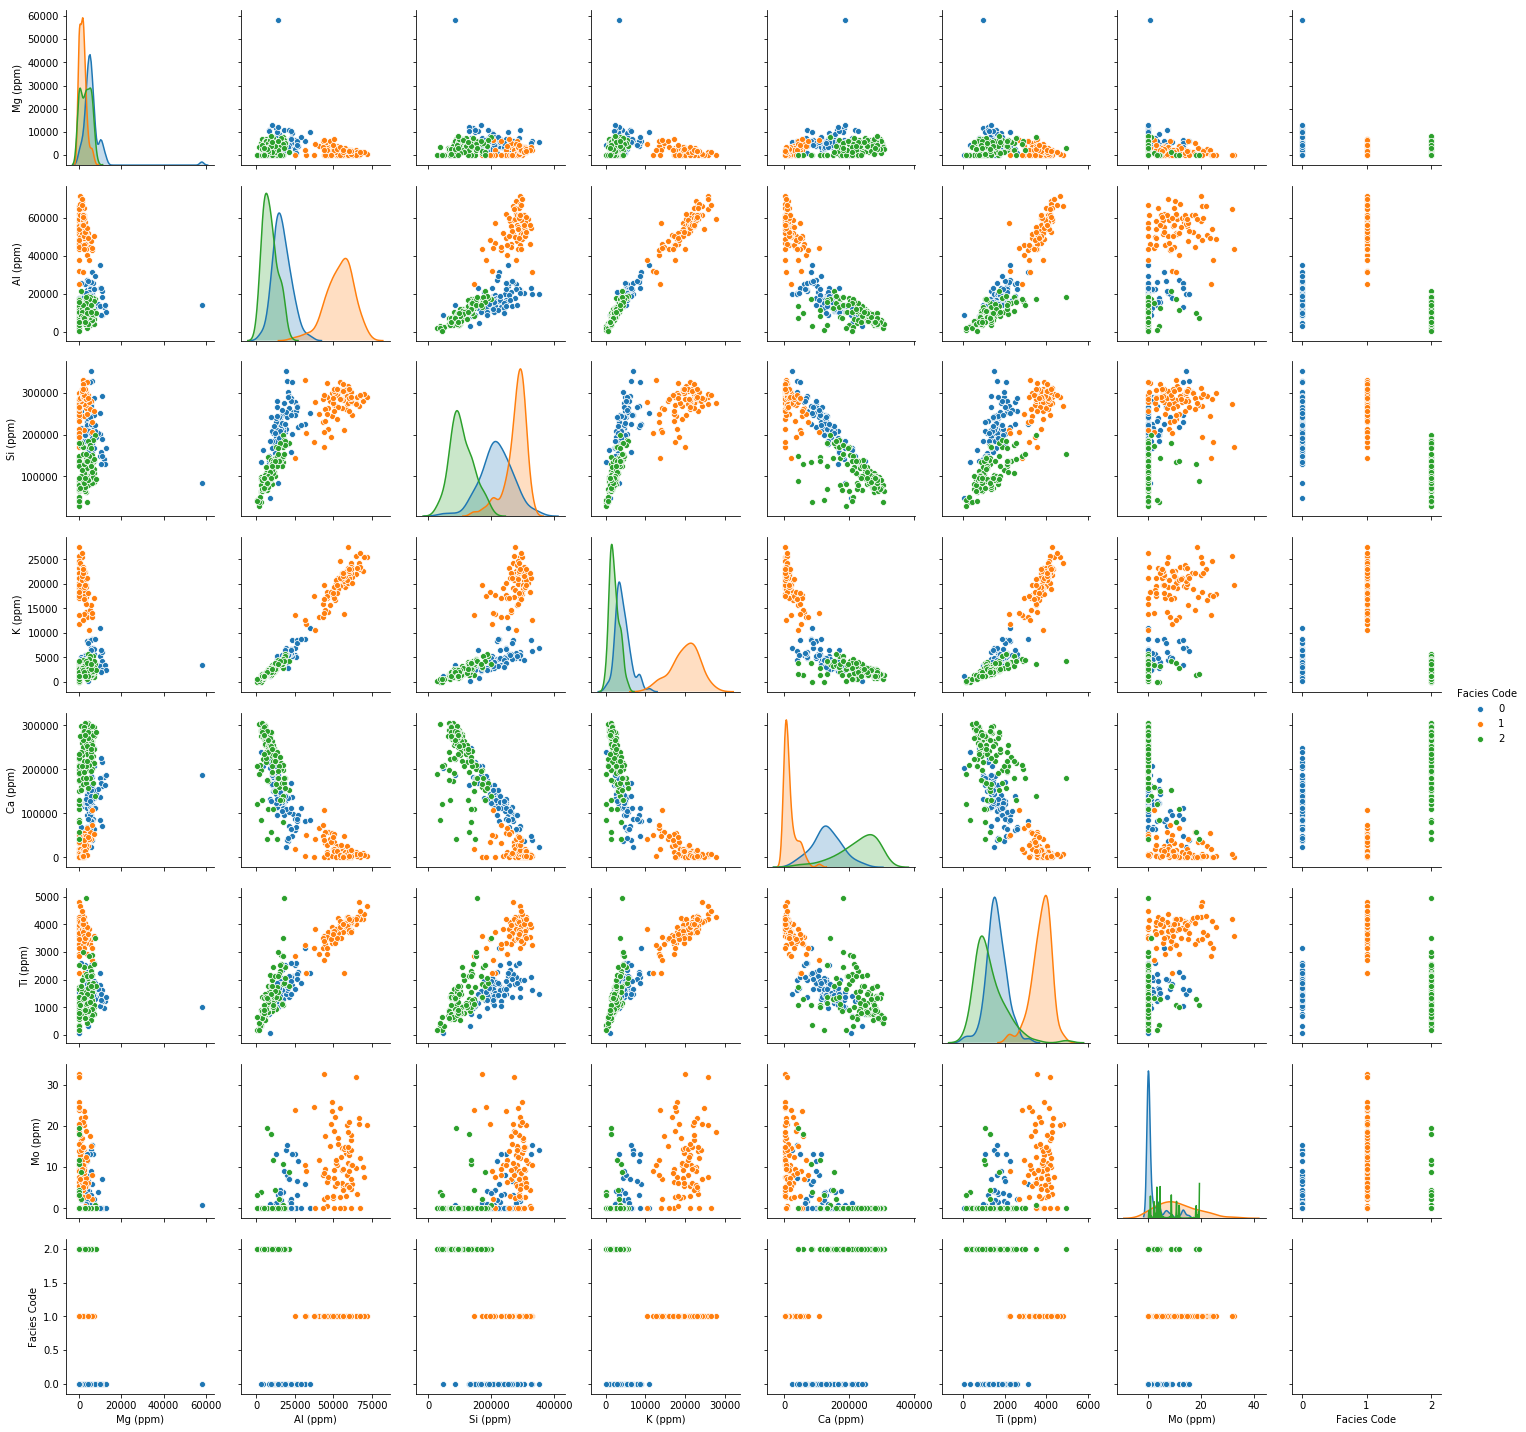

In [92]:
sb.pairplot(new_df.ix[:,(0,1,2,5,6,7,16,19)], hue = 'Facies Code')

## Using Boxplots to Visual distibution of Key Elemental proxies

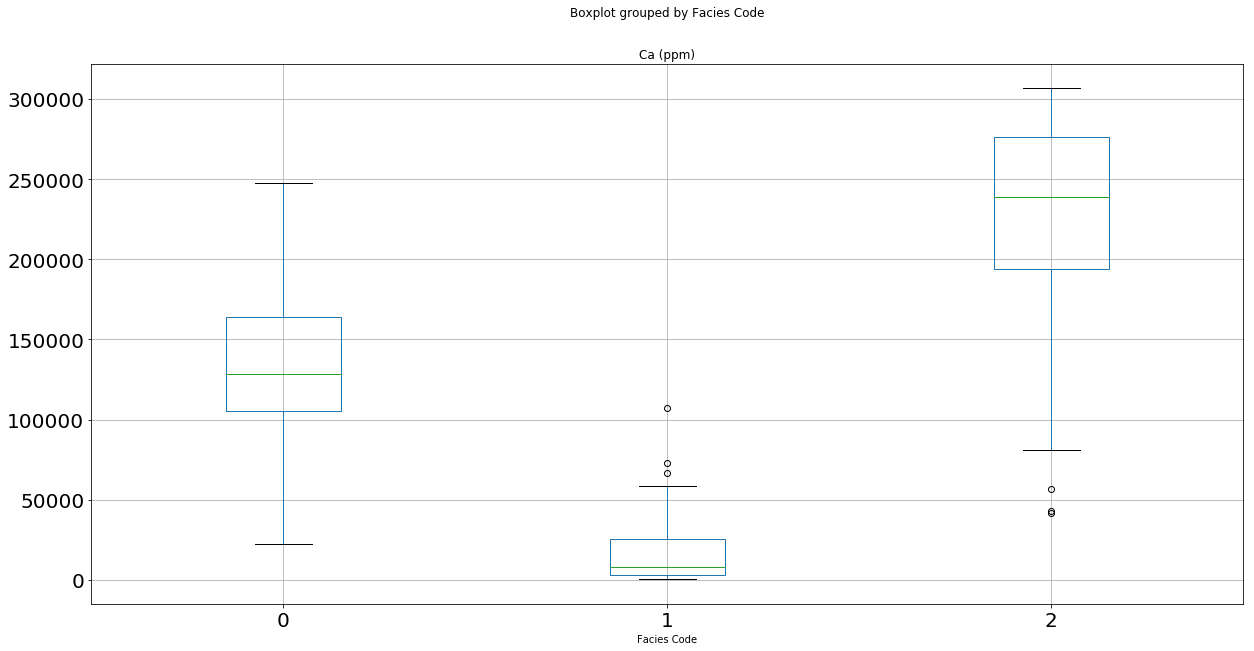

In [95]:
new_df.boxplot(column = 'Ca (ppm)', by = 'Facies Code', fontsize = 20, figsize = (20,10))

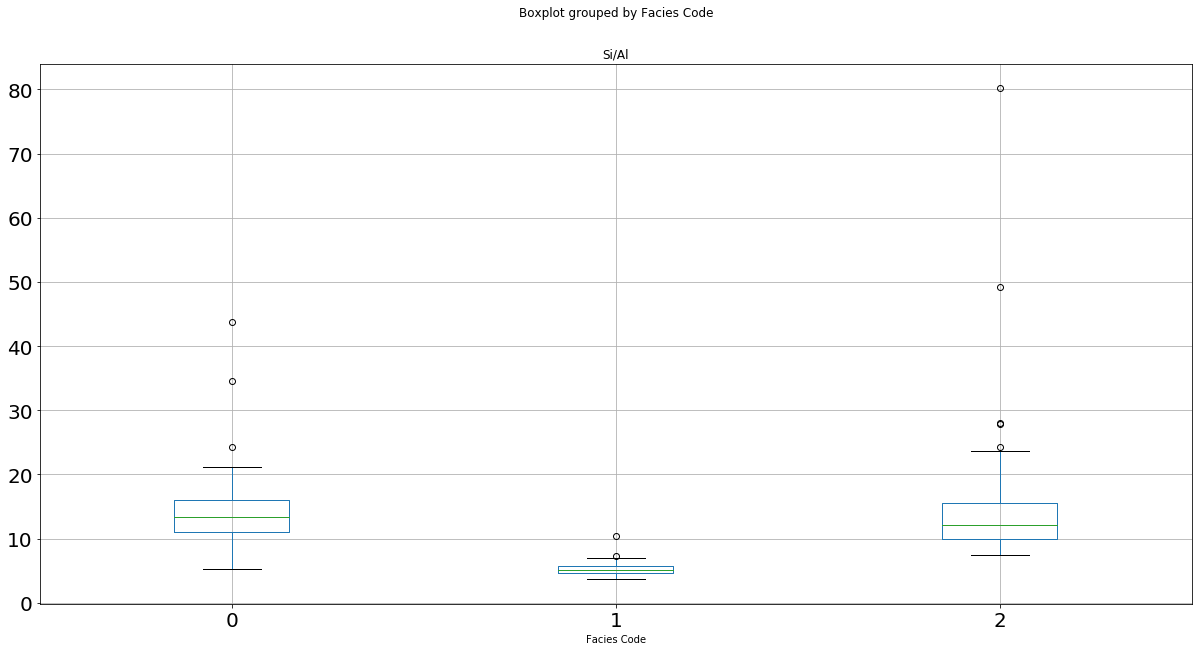

In [96]:
new_df.boxplot(column = 'Si/Al', by = 'Facies Code', fontsize = 20, figsize = (20,10))

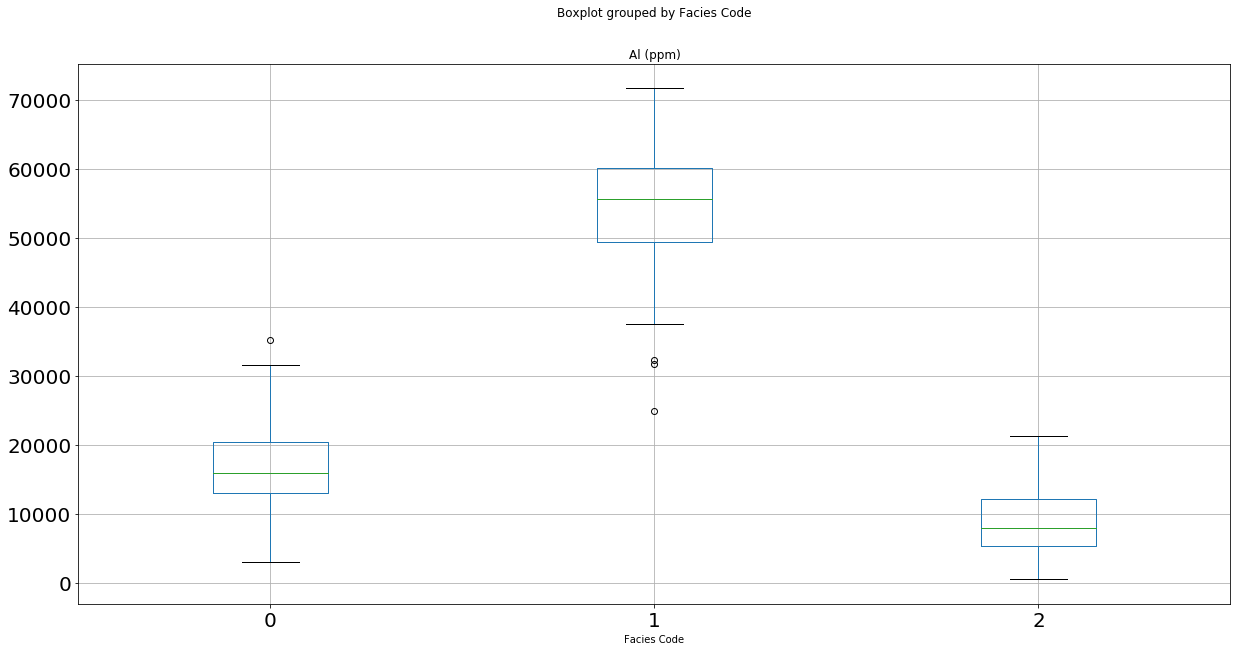

In [97]:
new_df.boxplot(column = 'Al (ppm)', by = 'Facies Code', fontsize = 20, figsize = (20,10))

In [101]:
total_data = pd.read_csv('cluster features.csv')

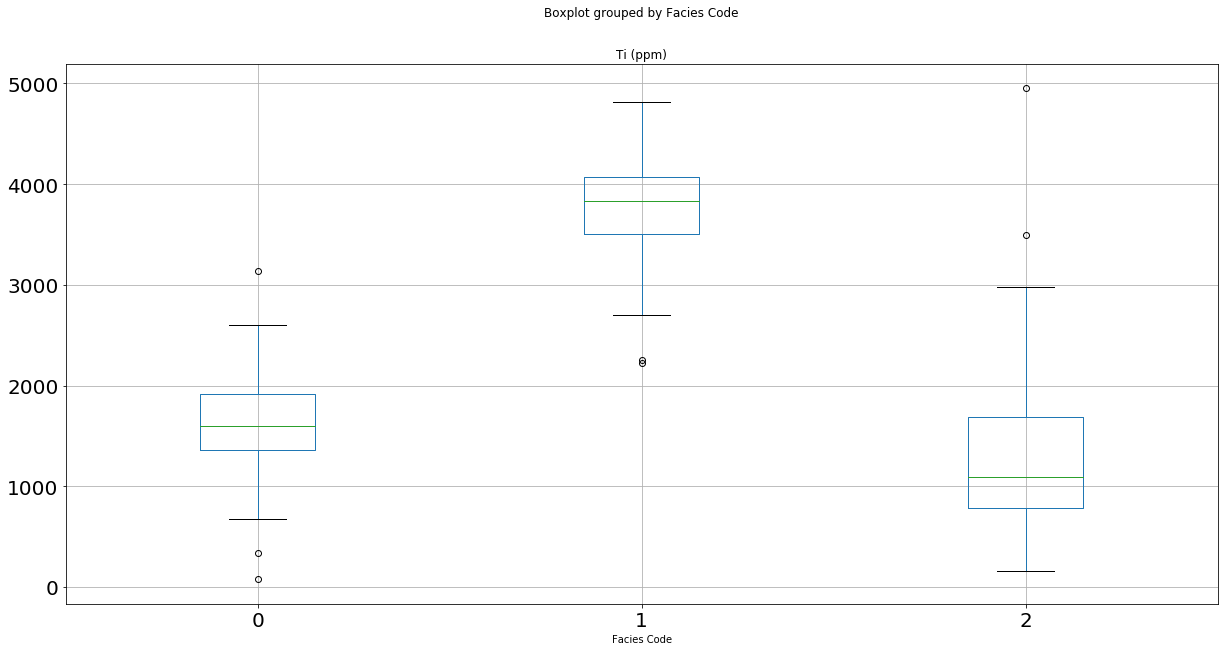

In [98]:
new_df.boxplot(column = 'Ti (ppm)', by = 'Facies Code', fontsize = 20, figsize = (20,10))

When the plots are analyzed we can easily conclude that class 0 and class 2 represent the siltstones, with their relatively low aluminium and calcium concetration and higher Si/Al concentration, while Class 1 represents the mudstones (argillaceous and bioturbated). However we observe a difference in the concentration of the calcium in the class 0 and class 2. Earlier we stated that difference in porosity observed in the siltstones is explained by their carbonate concentration with siltstones having less carbonates having more porosity. In this case we classify class 0 as the porous siltstone as the calcium content(key proxy for carbonate) is considerably lower than what is observed in class 2(non-porous siltstones). The image below compares the strat column produced by visually inspecting the core and the K-means label. A considerable overlap is observed, we also observe that the porous zones reduce as we go deeper into the formation this ties well with available literature on the sycamore formation. 

## Comparing Visual Characterization with Chemofacies Classification using K-means

In [160]:
import matplotlib.image as mpimg
img=mpimg.imread('Compare facies.png')

From the Image below that there is clear correlation from the information gotten from the XRF data, Class 1 clearly represents the mudstones (Argillaceous and Bioturbated) while the Class 0 represent the porous Siltstone and class 2 non-porous siltstone. This is also consistent with current literature on the characterization of the Sycamore with Siltstone getting less porous with depth as is evident in the image  

([], <a list of 0 Text xticklabel objects>)

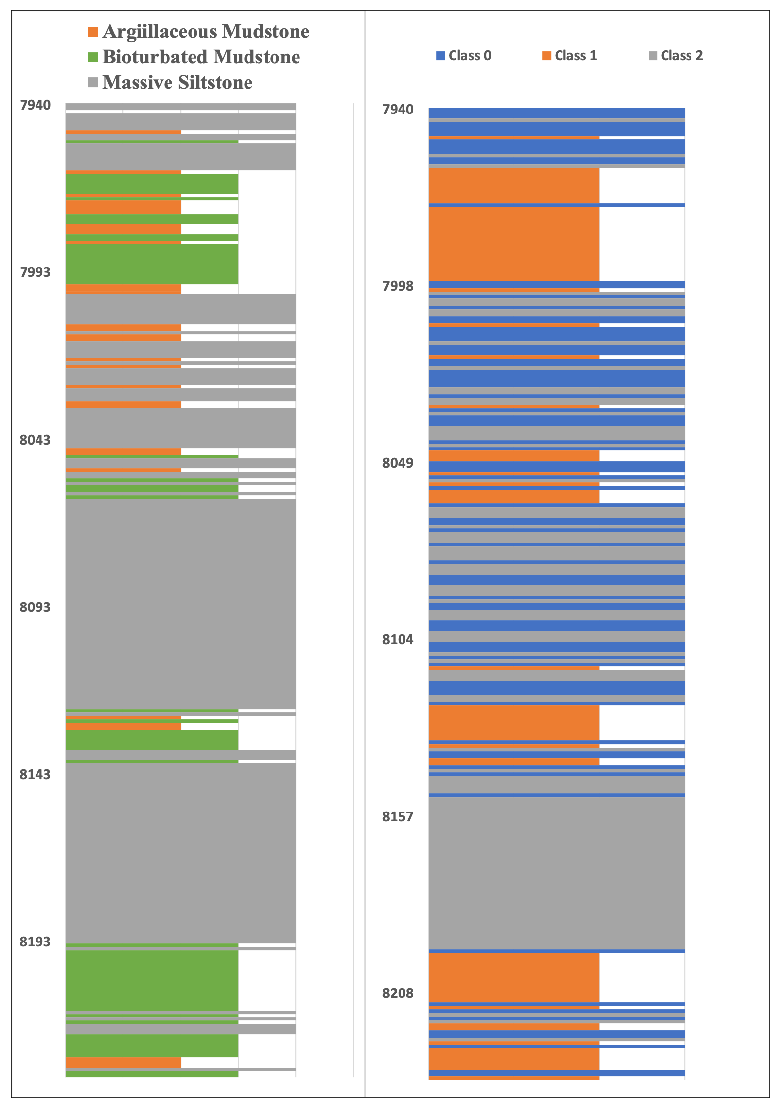

In [172]:
plt.figure(figsize=(40,20))
imgplot = plt.imshow(img)
plt.yticks([])
plt.xticks([])